In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
#mouse file has 250 rows of data
mouse_df = pd.read_csv(mouse_drug_data_to_load)

#clinical file has 1893 rows of data
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical_df = pd.merge(mouse_df, clinical_df, on='Mouse ID')

# Display the data table for preview
mouse_clinical_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
#Tumor Response to Treatment
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
mean_tumor_df = mouse_clinical_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
mean_tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
mean_tumor_se_df = mouse_clinical_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()
mean_tumor_se_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
#mean tumor volume pivot
mean_pivot_df = mean_tumor_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
mean_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
#mean tumor volume standard error pivot
mean_pivot_se_df = mean_tumor_se_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
mean_pivot_se_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


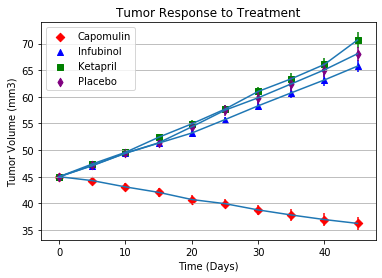

In [6]:
#mean_pivot_se_df.plot(kind="scatter", x="Timepoint", y="Capomulin")
#Capomulin, Infubinol, Ketapril, and Placebo
plt.scatter(mean_pivot_df.index, mean_pivot_df["Capomulin"], marker="D", color="red", label="Capomulin")
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Capomulin"], mean_pivot_se_df["Capomulin"], ecolor="red")
plt.scatter(mean_pivot_df.index, mean_pivot_df["Infubinol"], marker="^", color="blue", label="Infubinol")
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Infubinol"], mean_pivot_se_df["Infubinol"], ecolor="blue")
plt.scatter(mean_pivot_df.index, mean_pivot_df["Ketapril"], marker="s", color="green", label="Ketapril")
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Ketapril"], mean_pivot_se_df["Ketapril"], ecolor="green")
plt.scatter(mean_pivot_df.index, mean_pivot_df["Placebo"], marker="d", color="purple", label="Placebo")
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Placebo"], mean_pivot_se_df["Placebo"], ecolor="purple")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.savefig("images/TumorResponse.png")


In [7]:
plt.show()

In [8]:
# Metastatic Response to Treatment
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
metastatic_df = mouse_clinical_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean().reset_index()
metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the standard error associated with Mean Met. Site Data Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
metastatic_se_df = mouse_clinical_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().reset_index()
metastatic_se_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
metastatic_pivot_df = metastatic_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
metastatic_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [11]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
metastatic_pivot_se_df = metastatic_se_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
metastatic_pivot_se_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


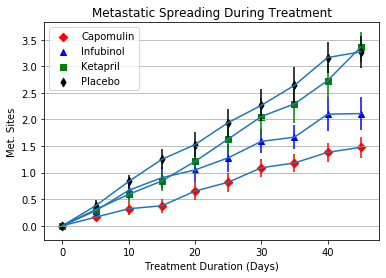

In [12]:
# Generate the Plot (with Error Bars)
#Capomulin, Infubinol, Ketapril, and Placebo
plt.scatter(metastatic_pivot_df.index, metastatic_pivot_df["Capomulin"], marker="D", color="red", label="Capomulin")
plt.errorbar(metastatic_pivot_df.index, metastatic_pivot_df["Capomulin"], metastatic_pivot_se_df["Capomulin"], ecolor="red")
plt.scatter(metastatic_pivot_df.index, metastatic_pivot_df["Infubinol"], marker="^", color="blue", label="Infubinol")
plt.errorbar(metastatic_pivot_df.index, metastatic_pivot_df["Infubinol"], metastatic_pivot_se_df["Infubinol"], ecolor="blue")
plt.scatter(metastatic_pivot_df.index, metastatic_pivot_df["Ketapril"], marker="s", color="green", label="Ketapril")
plt.errorbar(metastatic_pivot_df.index, metastatic_pivot_df["Ketapril"], metastatic_pivot_se_df["Ketapril"], ecolor="green")
plt.scatter(metastatic_pivot_df.index, metastatic_pivot_df["Placebo"], marker="d", color="black", label="Placebo")
plt.errorbar(metastatic_pivot_df.index, metastatic_pivot_df["Placebo"], metastatic_pivot_se_df["Placebo"], ecolor="black")
plt.title("Metastatic Spreading During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc='upper left')
plt.grid(axis='y')

In [13]:
# Save the Figure
plt.savefig("images/MetSites.png")
# Show the Figure
plt.show()


<Figure size 432x288 with 0 Axes>

In [14]:
#Survival Rates
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
survival_df = mouse_clinical_df.groupby(["Drug","Timepoint"])["Mouse ID"].count().reset_index()
survival_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
survival_pivot_df = survival_df.pivot(index="Timepoint", columns="Drug", values="Mouse ID")
survival_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


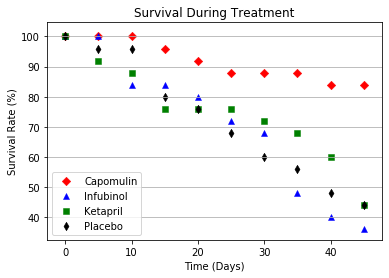

In [16]:
#Capomulin, Infubinol, Ketapril, and Placebo
# Instructions ask for a SCATTER plot here, but I don't think that is right.  I did it anyway.
plt.scatter(survival_pivot_df.index, (survival_pivot_df["Capomulin"]/25)*100, marker="D", color="red", lw=0.5, label="Capomulin")
plt.scatter(survival_pivot_df.index, (survival_pivot_df["Infubinol"]/25)*100, marker="^", color="blue", lw=0.5, label="Infubinol")
plt.scatter(survival_pivot_df.index, (survival_pivot_df["Ketapril"]/25)*100, marker="s", color="green", lw=0.5, label="Ketapril")
plt.scatter(survival_pivot_df.index, (survival_pivot_df["Placebo"]/25)*100, marker="d", color="black", lw=0.5, label="Placebo")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc='lower left')
plt.grid(axis='y')


In [17]:
# Save the Figure
plt.savefig("images/SurvivalRates.png")
# Show the Figure
plt.show()


<Figure size 432x288 with 0 Axes>

In [18]:
#sort the data by Drug(Ascending), Mouse ID(ascending), and Timepoint(descending)
#sorting was done to allow iteration through mouse and drug
mouse_clinical_sorted_df = mouse_clinical_df.sort_values(["Drug", "Mouse ID", "Timepoint"], ascending=[True, True, False]).reset_index(drop=True)
mouse_clinical_sorted_df["Next Mouse ID"] = mouse_clinical_sorted_df["Mouse ID"].shift(-1).fillna(0)
mouse_clinical_sorted_df["Next Volume"] = mouse_clinical_sorted_df["Tumor Volume (mm3)"].shift(-1).fillna(0)
mouse_clinical_sorted_df.head(60)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,Next Mouse ID,Next Volume
0,b128,Capomulin,45,38.982878,2,b128,38.379726
1,b128,Capomulin,40,38.379726,2,b128,37.967644
2,b128,Capomulin,35,37.967644,1,b128,40.605335
3,b128,Capomulin,30,40.605335,1,b128,43.262145
4,b128,Capomulin,25,43.262145,1,b128,42.731552
5,b128,Capomulin,20,42.731552,0,b128,43.784893
6,b128,Capomulin,15,43.784893,0,b128,43.270852
7,b128,Capomulin,10,43.270852,0,b128,45.651331
8,b128,Capomulin,5,45.651331,0,b128,45.000000
9,b128,Capomulin,0,45.000000,0,b742,38.939633


In [19]:
#By Far, the most frustrating task that I have come across so far in this bootcamp
#Extremely vague instructions
#I attempted to iterate through the data frame and total by mouse and then by drug
total_growth_list = []
drug_total_begin_volume = 0
drug_total_change_volume = 0

#get values from 1st row of the data frame
old_drug_name = mouse_clinical_sorted_df["Drug"].iloc[0]
end_volume = mouse_clinical_sorted_df["Tumor Volume (mm3)"].iloc[0]

#calculate total percent change by drug
#used last timepoint and timepoint zero by mouse and rolled up to drug

for index, row in mouse_clinical_sorted_df.iterrows():
    #calculated change amount per mouse and totaled when I hit the end for a particular drug
    if row["Drug"] != old_drug_name:
        drug_total_pct_change = (drug_total_change_volume/drug_total_begin_volume) * 100
        total_growth_list.append((old_drug_name, drug_total_pct_change))
        drug_total_begin_volume = 0
        drug_total_change_volume = 0
        old_drug_name = row["Drug"]
        
    #Sorted data in reverse timepoint order per mouse    
    if row["Timepoint"] == 0:
        begin_volume = row["Tumor Volume (mm3)"]
        mouse_id = row["Mouse ID"]
        change = end_volume - begin_volume
        drug_total_begin_volume += begin_volume
        drug_total_change_volume += change
        end_volume = row["Next Volume"]

drug_total_pct_change = (drug_total_change_volume/drug_total_begin_volume) * 100
total_growth_list.append((old_drug_name, drug_total_pct_change))        
        


In [226]:
#My numbers don't match the starter notebook, so I must not be calculating properly
#I got stuck on this one and ran out of time.
total_growth_list

[('Capomulin', -18.516516180559996),
 ('Ceftamin', 28.342170720888888),
 ('Infubinol', 30.44222240026666),
 ('Ketapril', 39.56931434286222),
 ('Naftisol', 36.012793366088886),
 ('Placebo', 34.463142991493335),
 ('Propriva', 25.078982094709406),
 ('Ramicane', -19.57468793759111),
 ('Stelasyn', 34.325798095367524),
 ('Zoniferol', 31.513906177742218)]

In [235]:
tumor_change_df = pd.DataFrame(total_growth_list, columns=["Drug","Pct Change"])
#tumor_change_df.set_index("Drug", drop=True)
tumor_change_slice_df = tumor_change_df.loc[[0,2,3,5]]
tumor_change_slice_df

,Drug,Pct Change
0,Capomulin,-18.516516
2,Infubinol,30.442222
3,Ketapril,39.569314
5,Placebo,34.463143


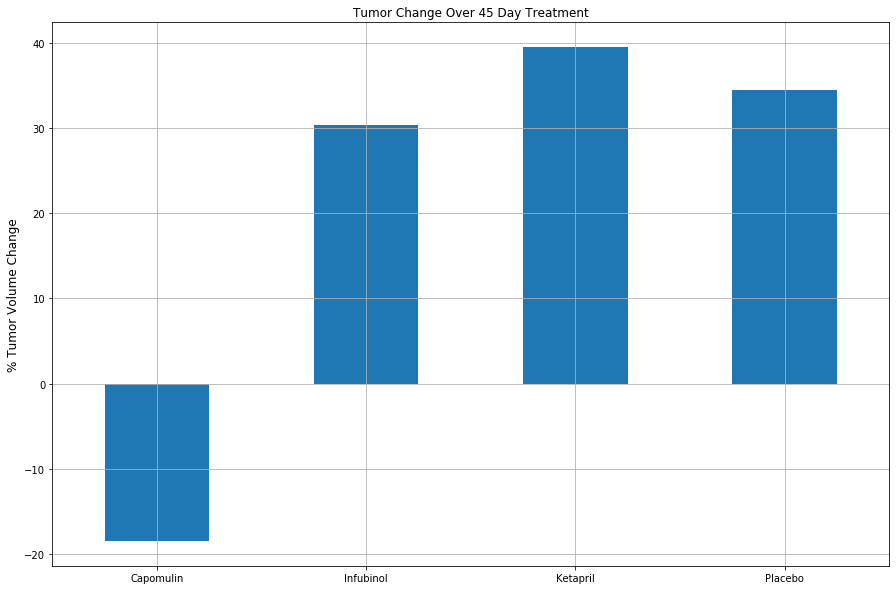

In [246]:
ax = tumor_change_slice_df.plot(kind='bar', title ="Tumor Change Over 45 Day Treatment", figsize=(15, 10), legend=False )
ax.set_xticklabels(tumor_change_slice_df["Drug"], rotation='horizontal')
ax.set_ylabel("% Tumor Volume Change", fontsize=12)
ax.grid('on')
#plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
#plt.ylabel('Usage')


